In [1]:
import pandas as pd
import numpy as np

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Customer churn prediction').getOrCreate()
spark

In [3]:
df = spark.read.csv('C:/Users/md.owais/Desktop/Customer Chun Prediction/data/test_churn.csv', inferSchema=True, header=True)

In [4]:
df.show()

+---+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+
| id|state|account_length|    area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|
+---+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------

Shape

In [5]:
shape = df.count(), len(df.columns)
shape

(750, 20)

Mising Values Analysis

In [6]:
from pyspark.sql.functions import isnan, count, when, col, expr, substring
total_col = df.columns
df.select([count(when( col(c).contains('NA') | col(c).contains('None') \
                      | (col(c) == "NaN") | (col(c) == '') | (col(c) == 'NULL')\
                      | col(c).isNull() | isnan(c) ,c)).alias(c) for c in total_col]).show()

+---+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+
| id|state|account_length|area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|
+---+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------------------

Duplicates Records analysis

In [7]:
df.count(), df.distinct().count()

(750, 750)

EDA

In [8]:
# 1. Remove area_code_ from area_code column
# Remove id column


In [9]:
df=df.drop('id')

Removing 'area_code_' from area_code column

In [10]:
df=df.withColumn('area_code', expr("substring(area_code,11,12)"))

In [11]:
df.show()

+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+
|state|account_length|area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|
+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+
|

In [12]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: integer (nullable = true)
 |-- area_code: string (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: integer (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: integer (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: integer (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: integer (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: integer (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- number_customer_service_calls: integer (nullable = true)



Convirsion of area code into integer

In [13]:
from pyspark.sql.types import IntegerType, StringType,FloatType,DoubleType
df=df.withColumn('area_code', df['area_code'].cast(IntegerType()))

In [14]:
df.select('area_code').dtypes

[('area_code', 'int')]

Null values using heatmap

In [15]:
import seaborn as sns

<Axes: >

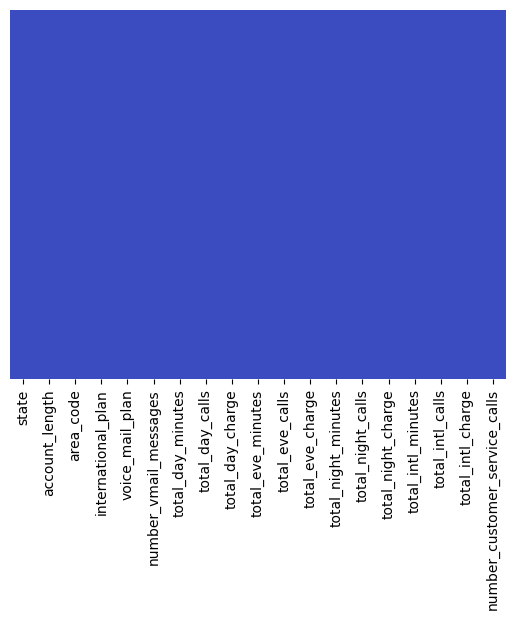

In [16]:
sns.heatmap(df.toPandas().isnull(), yticklabels=False, cbar=False,cmap='coolwarm')

Correlation between Each pairs of feature

C:\Users\md.owais\AppData\Local\Temp\ipykernel_26400\150500497.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig=sns.heatmap(df.toPandas().corr(),annot=True,cmap='inferno')


<Axes: >

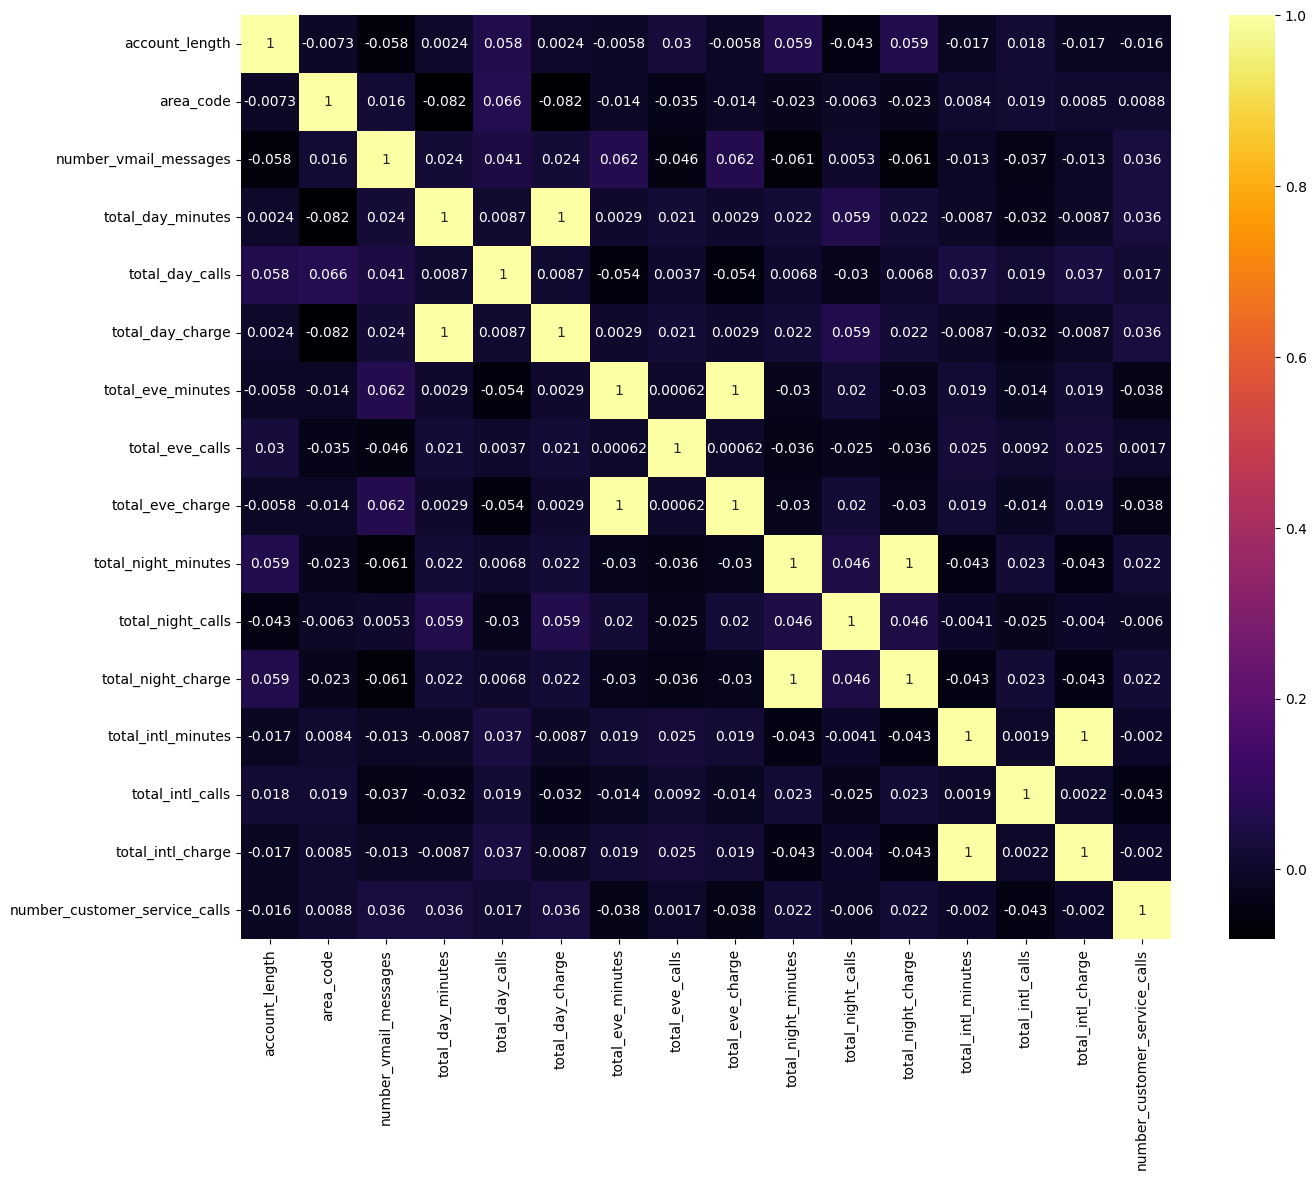

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
fig=sns.heatmap(df.toPandas().corr(),annot=True,cmap='inferno')
fig

In [20]:
copy_df = df

In [21]:
removal_col = ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']

In [22]:
copy_df = copy_df.drop(*(removal_col))

In [23]:
len(copy_df.columns), len(df.columns)

(15, 19)

In [24]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: integer (nullable = true)
 |-- area_code: integer (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: integer (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: integer (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: integer (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: integer (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: integer (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- number_customer_service_calls: integer (nullable = true)



In [25]:
import plotly.express as px

In [26]:
import seaborn as sns

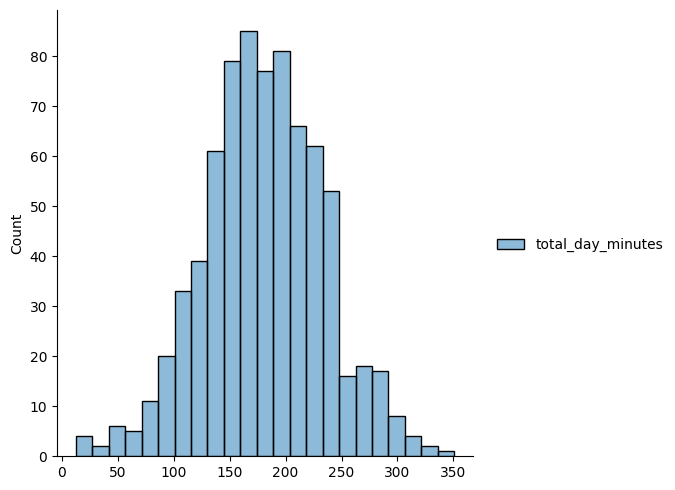

In [27]:
sns.displot(df.select('total_day_minutes').toPandas())

In [ ]:
df.coalesce(1).write.option("header",True).csv("C:/Users/md.owais/Desktop/Customer Chun Prediction/data/cleand_test_data")

In [30]:
from pyspark.ml import PipelineModel
pipeline = PipelineModel.load('C:/Users/md.owais/Desktop/Customer Chun Prediction/model/pipeline')

In [34]:
model_df = pipeline.transform(df)

In [37]:
model_df.select('features').show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                                                                                             |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(65,[16,50,52,54,55,56,57,58,59,60,61,62,63,64],[7.061142870595

Importing Varience_threshold_selectors

In [38]:
from pyspark.ml.feature import VarianceThresholdSelectorModel

In [41]:
variance_threshold_selector = VarianceThresholdSelectorModel.load('C:/Users/md.owais/Desktop/Customer Chun Prediction/model/variance-threshold-selector')

In [42]:
variance_threshold_selector.transform(model_df).head().selectedFeatures

SparseVector(65, {16: 7.0611, 50: 1.9998, 52: 3.4398, 54: 3.2243, 55: 1.8601, 56: 5.5413, 57: 4.9085, 58: 4.9727, 59: 3.9286, 60: 4.5289, 61: 4.8589, 62: 1.218, 63: 3.6232, 64: 0.7625})

In [43]:
len(variance_threshold_selector.selectedFeatures)

65

chiSqModel import

In [44]:
from pyspark.ml.feature import ChiSqSelectorModel

In [47]:
chi_model = ChiSqSelectorModel.load('../model/chi_model')

In [48]:
chi_model.transform(model_df).head().selectedFeatures

SparseVector(55, {14: 7.0611, 43: 1.9998, 44: 3.4398, 46: 1.8601, 47: 5.5413, 48: 4.9085, 49: 4.9727, 50: 3.9286, 51: 4.8589, 52: 1.218, 53: 3.6232, 54: 0.7625})

In [49]:
len(chi_model.selectedFeatures)

55